In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# read in data
df = pd.read_csv('cleaned_data.csv')

# list all column names without ...
pd.set_option('display.max_columns', None)
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (20,32,33,41,42,43,44,45,46,47,48,49,50,105,106,111) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division,Station,Milepost,State Abbreviation,County Name,District,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause Code,Accident Cause Code,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Joint CD,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,0.0,0.0,0.0,0.0,GEORGIA,NaN,MACON,242.00,GA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,6.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,NaN,NaN,NaN,NaN,Not a remotely controlled operation,150060,13.0,No,NaN,NaN,0.0,NaN,0.0,0.0,No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,H607,H607,1.0,0.0,1.0,0.0,6.0,40.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTH,000-000-000,32.813658,-83.622785,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,3.0,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,4.0,0.0,0.0,0.0,GEORGIA,NaN,MACON,242.00,GA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,4.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted 

In [15]:
initial_dat = df.loc[:,
        ['Reporting Railroad Name',
        'Report Year',
        'Other Railroad Name',
        'Maintenance Railroad Name',
        'Date',
        'Time',
        'Accident Type',
        'Persons Evacuated',
        'Temperature',
        'Visibility',
        'Weather Condition',
        'Track Type',
        'Track Class',
        'Track Density',
        'Equipment Type',
        'Equipment Attended',
        'Train Speed',
        'Recorded Estimated Speed',
        'Maximum Speed',
        'Gross Tonnage',
        'Signalization',
        'Method of Operation',
        'First Car Loaded',
        'Causing Car Loaded',
        'Positive Alcohol Tests',
        'Positive Drug Tests',
        'Passengers Transported',
        'Loaded Freight Cars',
        'Loaded Passenger Cars',
        'Derailed Loaded Freight Cars',
        'Derailed Loaded Passenger Cars',
        'Derailed Empty Freight Cars',
        'Derailed Empty Passenger Cars',
        'Total Damage Cost',
        'Primary Accident Cause Code',
        'Accident Cause Code',
        'Engineers On Duty',
        'Firemen On Duty',
        'Conductors On Duty',
        'Brakemen On Duty',
        'Total Persons Injured',
        'Latitude',
        'Longitude',
        'Others Injured',
        'Passengers Injured',
        'Railroad Employees Injured']]


# Drop all rows with NA in Report Year or Total Damage Cost
initial_dat = initial_dat.dropna(subset=['Report Year','Total Persons Injured','Railroad Employees Injured','Passengers Injured','Others Injured'])

# Convert Report Year to int
initial_dat['Year'] = initial_dat['Report Year'].astype(int)
initial_dat = initial_dat.drop('Report Year', axis=1)

# Convert Date to Datetime
initial_dat = initial_dat.dropna(subset=['Date'])
initial_dat['date'] = pd.to_datetime(initial_dat['Date'])
initial_dat = initial_dat.drop('Date',axis=1)

# new time features based on datetime var/index
initial_dat['dayofweek'] = initial_dat['date'].dt.dayofweek.astype(int)
initial_dat['month'] = initial_dat['date'].dt.month.astype(int)


## Examine Counts/Proportion of Injuries Amongst People

In [39]:
employee_props = initial_dat.groupby('Year')['Railroad Employees Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()
passenger_props = initial_dat.groupby('Year')['Passengers Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()
other_props = initial_dat.groupby('Year')['Others Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()

injury_props = pd.DataFrame({'employee':employee_props, 'passenger':passenger_props, 'other':other_props})
injury_props.head()

,employee,passenger,other
Year,,,
1975,0.197301,0.308050,0.059097
1976,0.315979,0.239691,0.103608
1977,0.485597,0.052126,0.137860
1978,0.234995,0.267069,0.104795
1979,0.305161,0.163348,0.049573


<function matplotlib.pyplot.show(close=None, block=None)>

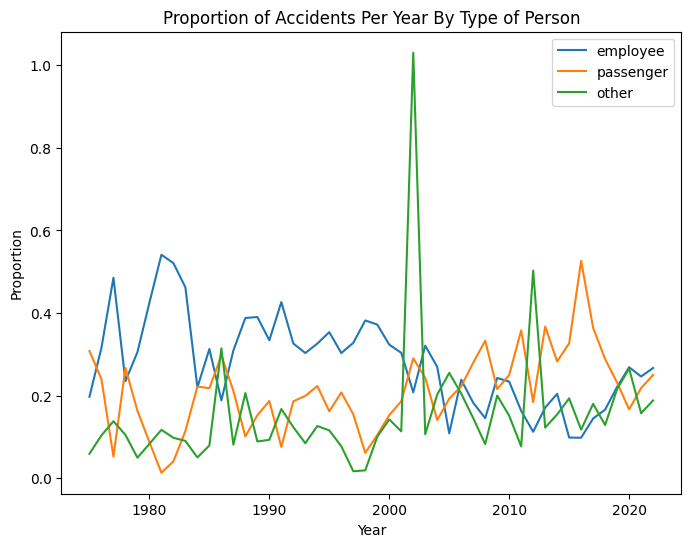

In [40]:
plt.figure(figsize=(8,6))
plt.plot(injury_props['employee'], label='employee')
plt.plot(injury_props['passenger'], label='passenger')
plt.plot(injury_props['other'], label='other')
plt.title('Proportion of Injuries Per Year By Type of Person')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show

In [38]:
employee_counts = initial_dat.groupby('Year')['Railroad Employees Injured'].sum()
passenger_counts = initial_dat.groupby('Year')['Passengers Injured'].sum()
other_counts = initial_dat.groupby('Year')['Others Injured'].sum()
total_injuries = initial_dat.groupby('Year')['Total Persons Injured'].sum()

injury_counts = pd.DataFrame({'employee':employee_counts, 'passenger':passenger_counts, 'other':other_counts, 'total':total_injuries})
injury_counts[injury_counts.index>2000]


,employee,passenger,other,total
Year,,,,
2001,225.0,138.0,84.0,741.0
2002,217.0,303.0,1076.0,1044.0
2003,190.0,144.0,63.0,592.0
2004,222.0,116.0,167.0,824.0
2005,189.0,335.0,444.0,1741.0
2006,164.0,153.0,141.0,688.0
2007,162.0,248.0,129.0,887.0
2008,134.0,307.0,76.0,922.0
2009,108.0,96.0,89.0,445.0


<function matplotlib.pyplot.show(close=None, block=None)>

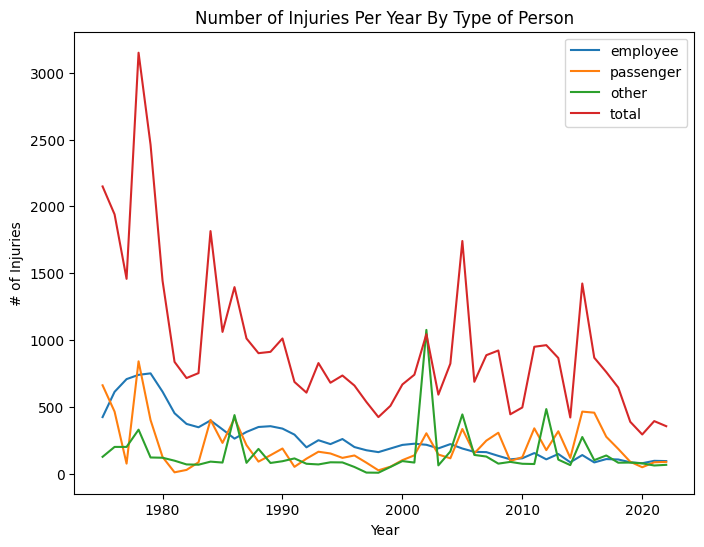

In [41]:
plt.figure(figsize=(8,6))
plt.plot(injury_counts['employee'], label='employee')
plt.plot(injury_counts['passenger'], label='passenger')
plt.plot(injury_counts['other'], label='other')
plt.plot(injury_counts['total'], label='total')
plt.title('Number of Injuries Per Year By Type of Person')
plt.xlabel('Year')
plt.ylabel('# of Injuries')
plt.legend()
plt.show

In [ ]:
#removing the year 2003 due to errors
initial_dat = initial_dat.drop(initial_dat[initial_dat['Year'] == 2003].index, inplace = True)

In [50]:
initial_dat['Track Class'].isna().sum()


12044

## Looking Specifically At Employee Injuries

need to remove a lot of these features and reduce th amount of features we need to encode, also find int variables accidentally miscoded and recode, going to use log reg and random forest classification or regression

In [ ]:
cat_features = df.loc[:,
        ['Reporting Railroad Name',
        'Accident Type',
        'Persons Evacuated',
        'Temperature',
        'Weather Condition',
        'Track Class',
        'Equipment Type',
        'Equipment Attended',
        'Train Speed',
        'Recorded Estimated Speed',
        'Maximum Speed',
        'Gross Tonnage',
        'Signalization',
        'Method of Operation',
        'First Car Loaded',
        'Causing Car Loaded',
        'Positive Alcohol Tests',
        'Positive Drug Tests',
        'Passengers Transported',
        'Loaded Freight Cars',
        'Loaded Passenger Cars',
        'Derailed Loaded Freight Cars',
        'Derailed Loaded Passenger Cars',
        'Derailed Empty Freight Cars',
        'Derailed Empty Passenger Cars',
        'Total Damage Cost',
        'Primary Accident Cause Code',
        'Accident Cause Code',
        'Engineers On Duty',
        'Firemen On Duty',
        'Conductors On Duty',
        'Brakemen On Duty',
        'Total Persons Injured',
        'Latitude',
        'Longitude',
        'Others Injured',
        'Passengers Injured',
        'Railroad Employees Injured']]

num_features = df.select_dtypes(include=['float64', 'int64'])
num_features = num_features.drop(subset=['Accident Year',
                                         'Accident Month',
                                         'Other Accident Year',
                                         'Other Accident Month',
                                         'Maintenance Accident Year',
                                         'Maintenance Accident Month'])

